In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
from library.analysis import TensorboardLogReader, TensorboardPlot

In [3]:
unet_resnet34_train = TensorboardLogReader('output/Unet_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740840968.d4c8365383ba.1342.3')
unet_resnet34_test = TensorboardLogReader('output/Unet_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740842041.d4c8365383ba.1342.4')

deeplabv3_resnet34_train = TensorboardLogReader('output/DeepLabV3_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740842170.d4c8365383ba.1342.5')
deeplabv3_resnet34_test = TensorboardLogReader('output/DeepLabV3_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740843113.d4c8365383ba.1342.6')

deeplabv3plus_resnet34_train = TensorboardLogReader('output/DeepLabV3Plus_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740839667.d4c8365383ba.1342.0')
deeplabv3plus_resnet34_test = TensorboardLogReader('output/DeepLabV3Plus_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740840684.d4c8365383ba.1342.1')

print(unet_resnet34_train.tags)

['hp_metric', 'lr-AdamW', 'train/loss', 'epoch', 'val/loss', 'val/Multiclass_Accuracy', 'val/multiclassaccuracy_No', 'val/multiclassaccuracy_Cloud', 'val/Multiclass_F1_Score', 'val/Multiclass_Jaccard_Index', 'val/multiclassjaccardindex_No', 'val/multiclassjaccardindex_Cloud', 'val/Multiclass_Jaccard_Index_Micro', 'train/Multiclass_Accuracy', 'train/multiclassaccuracy_No', 'train/multiclassaccuracy_Cloud', 'train/Multiclass_F1_Score', 'train/Multiclass_Jaccard_Index', 'train/multiclassjaccardindex_No', 'train/multiclassjaccardindex_Cloud', 'train/Multiclass_Jaccard_Index_Micro']


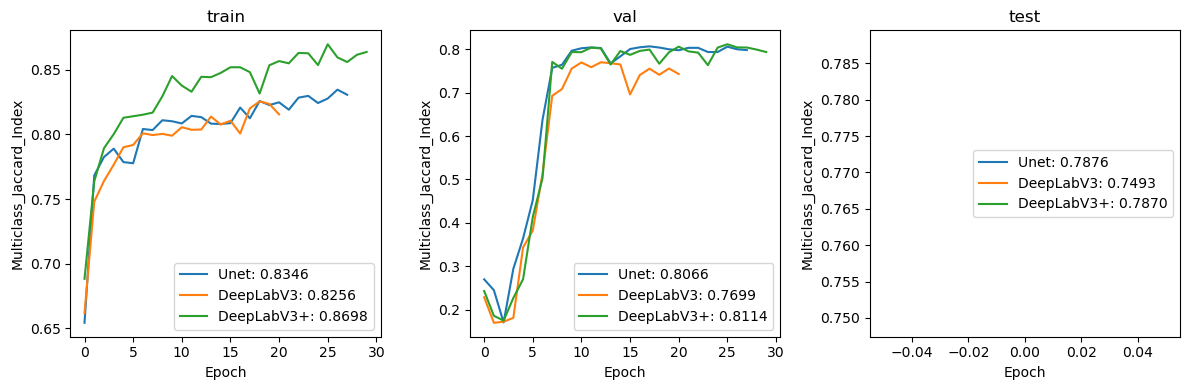

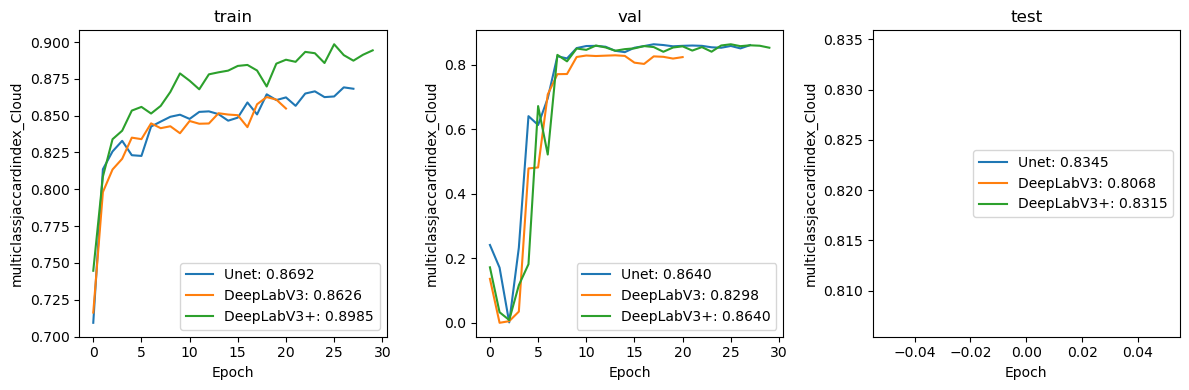

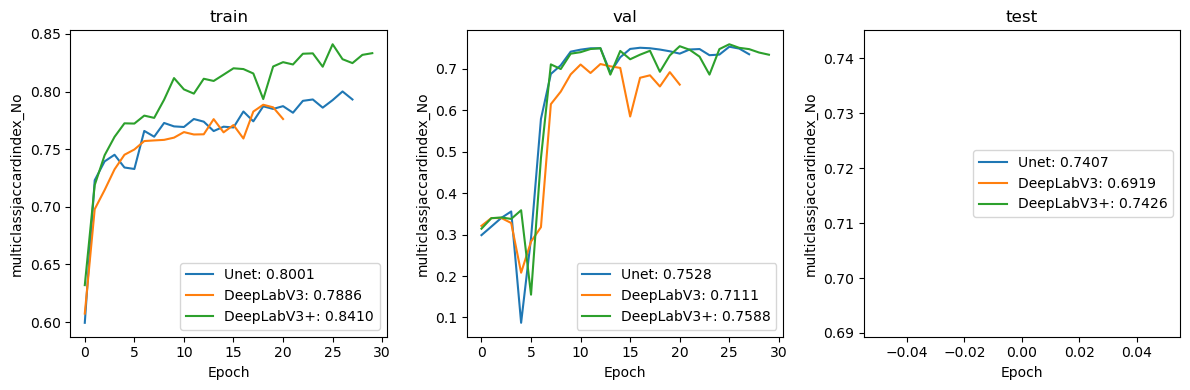

In [10]:
models = {
    'Unet': [unet_resnet34_train, unet_resnet34_test],
    'DeepLabV3': [deeplabv3_resnet34_train, deeplabv3_resnet34_test],
    'DeepLabV3+': [deeplabv3plus_resnet34_train, deeplabv3plus_resnet34_test]
}

TensorboardPlot(models, 'Multiclass_Jaccard_Index')
TensorboardPlot(models, 'multiclassjaccardindex_Cloud')
TensorboardPlot(models, 'multiclassjaccardindex_No')

In [5]:
from terratorch.models.encoder_decoder_factory import EncoderDecoderFactory

EncoderDecoderFactory


from terratorch.registry import DECODER_REGISTRY

from terratorch.registry import BACKBONE_REGISTRY

from terratorch.models import pixel_wise_model

In [15]:
! pip show terratorch

Name: terratorch
Version: 0.99.7
Summary: TerraTorch - A model training toolkit for geospatial tasks
Home-page: 
Author: Romeo Kienzler, Benedikt Blumenstiel
Author-email: Carlos Gomes <carlos.gomes@ibm.com>, Joao Lucas de Sousa Almeida <joao.lucas.sousa.almeida@ibm.com>
License: Apache License, Version 2.0
Location: /Users/hyeongkyunkim/miniconda3/envs/s2-cloudcover-terratorch/lib/python3.11/site-packages
Requires: albucore, albumentations, geopandas, h5py, lightly, lightning, mlflow, rasterio, rioxarray, segmentation-models-pytorch, torch, torchgeo, torchmetrics, torchvision
Required-by: 


In [6]:
BACKBONE_REGISTRY

MultiSourceRegistry(terratorch=Registry({}), timm=TimmRegistry())

In [25]:
for r in DECODER_REGISTRY['terratorch'].__iter__():
    print(r)

FCNDecoder
IdentityDecoder
SatMAEHead
UperNetDecoder
MLPDecoder


In [3]:
import torch

x = torch.randn(42, 10)
skip_input = torch.randn(42, 8)

# works
out = torch.cat((x, skip_input), dim=1)
print(out.shape)
# torch.Size([42, 18])

# fails, since two sizes differ
skip_input = torch.randn(39, 8)
out = torch.cat((x, skip_input), dim=1)
# RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 42 but got size 39 for tensor number 1 in the list.

torch.Size([42, 18])


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 42 but got size 39 for tensor number 1 in the list.

In [28]:
1000/69

14.492753623188406